In [5]:
import os
import json
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
data = []
count = {}

with open('run5_2021-01-27_final.json','r') as file:
    data = json.load(file)

for item in data:

    url = item['img_url']
    hash_ = item['img_hash']

    cat = url.split("_")[3]
    num = int(url.split("_")[2])

    if(num not in count):
        count[num] = {}

    if(cat not in count[num]):
        count[num][cat] = set()

    count[num][cat].add(hash_)

###  The structure of count is:

count =

        5 = 
        
        {
            'health': set(h1,h2,h3),
            'sports': set(h1,h2,h3),
        }
        
        10 =
        
        {
            'sports': set(h1,h2,h3),
            'health': set(h1,h2,h3),
        }

Adult


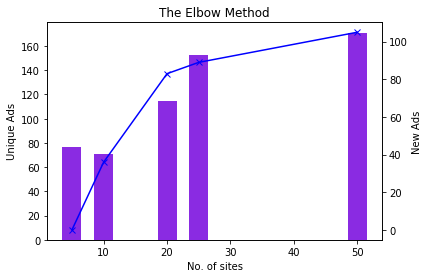

Sports


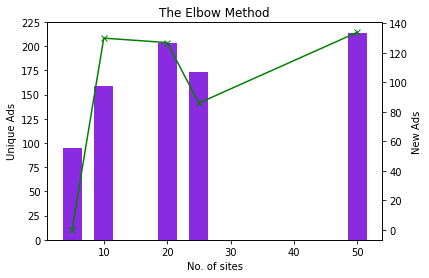

Health


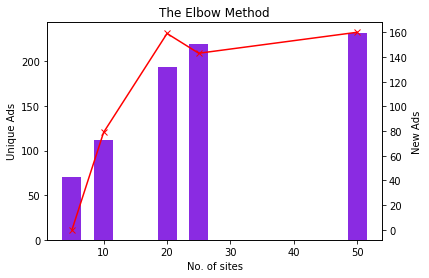

Games


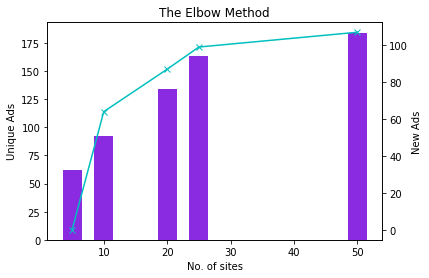

Recreation


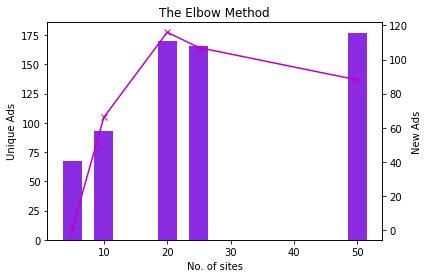

News


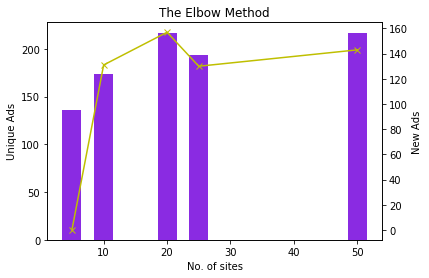

In [51]:
personas = ["Adult","Sports","Health","Games","Recreation","News"]
no_site  = [5,10,20,25,50]
colors   = ['bx-','gx-','rx-','cx-','mx-','yx-']
data = {}
for cindex,p in enumerate(personas):
    data[p] = {}
    y = []
    u = []
    print(p)
    for index,s in enumerate(no_site):
        
        d = count[s][p]
        c = count[s][p]
        l = 0
        if(index != 0):
            
            prev_c = data[p][no_site[index - 1]]["combined_hashes"]
            l = len(d) - len(d.intersection(prev_c))
            c = d.union(prev_c)
        
        data[p][s] = {"combined_hashes":d}
        
        y.append(l)
        u.append(len(d))
        
    
    plt.bar(no_site,u, 3, color='blueviolet')
    plt.ylabel('Unique Ads')
    plt.xlabel('No. of sites')
    
    axes2 = plt.twinx()
    plt.plot(no_site, y, colors[cindex])
    axes2.set_ylabel('New Ads')
    
    plt.title('The Elbow Method')
    plt.show()
    
    
    